In [1]:
import numpy as np
import matplotlib.pyplot as plt

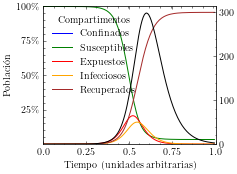

In [12]:
MAX_DAYS = 150

Sh = np.zeros(MAX_DAYS)
S = np.zeros(MAX_DAYS)
E = np.zeros(MAX_DAYS)
I = np.zeros(MAX_DAYS)
R = np.zeros(MAX_DAYS)
Pd = np.zeros(MAX_DAYS)
D = np.zeros(MAX_DAYS)

i_initial = 1
N = 1000000

I[0] = i_initial
S[0] = N-i_initial

betta = 0.07
permeability = 0.05
k_confined = 3
k_active = 12
mu = 0.24
eta = 0.2
IFR = 0.01
xi = 0.1
sigma = 2.5

def secure_home(i, n):
    return np.power((1-i/n), sigma-1)

def p_infeccion(i, n, k):
    return 1- np.power((1- betta*i/n), k)

def variations(sh, s, e, i, pd, d, r, p_active):
    St = sh + s
    N = sh + s + e + i + pd + r + d

    P_cont = p_active * p_infeccion(i,N, k_active) + (1-p_active)* (1-secure_home(i,N)*(1-permeability))*p_infeccion(i,N, k_confined)
    
    return (
        St * (1-p_active)*secure_home(i,N)*(1-permeability), 
        -St*P_cont, 
        -eta*e + St*P_cont, 
        -mu*i + eta*e,
        mu*IFR*i + -xi*pd,
        xi*pd,
        mu*(1-IFR)*i
        )


P_active = np.ones(MAX_DAYS)
# P_active[0:70] = 0


for t in range(MAX_DAYS-1):
    c = variations(Sh[t], S[t], E[t], I[t], Pd[t], D[t], R[t], P_active[t])

    Sh[t+1]   = Sh[t] + c[0] 
    S[t+1]    = S[t]  + c[1] 
    E[t+1]    = E[t]  + c[2] 
    I[t+1]    = I[t]  + c[3] 
    Pd[t+1]   = Pd[t] + c[4] 
    D[t+1]    = c[5] 
    R[t+1]    = R[t]  + c[6] 

with plt.style.context('science'):
    fig, ax = plt.subplots()

    l_sh = ax.plot(Sh, label='Confinados', color='blue')
    l_s = ax.plot(S, label='Susceptibles', color='green')
    l_e = ax.plot(E, label='Expuestos', color='red')
    l_i = ax.plot(I, label='Infecciosos', color='orange')
    l_r = ax.plot(R, label='Recuperados', color='brown')
    # ax.plot(Pd, label='', color='orange')
    l_d = ax_muertos = ax.twinx()

    ax_muertos.plot(D, label='Muertos', color='black')



    ax.set_xlabel("Tiempo (unidades arbitrarias)")
    ax.set_xticks(ticks= np.linspace(0, len(I), 5, dtype=int), labels=list(map(str, np.linspace(0, 1, 5))))
    ax.set_ylabel("Población ")
    ax.set_yticks(ticks= np.linspace(N/4, N, 4, dtype=int), labels=list(map(lambda x: f"{int(x)}\%", np.linspace(0.25, 1, 4)*100)))
    ax.legend(title='Compartimentos', )
    ax.set_xlim(0, len(S))
    ax.set_ylim(0, N)
    ax_muertos.set_ylim(ymin=0)
    plt.tight_layout()
    plt.show()
    fig.savefig("images/Our_Model.pdf")